Support Vector Machine:
SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems.

In this example we will be uisng Iris dataset
The goal is to train an SVM model to predict the species of iris flowers based on their measurements.

1) Importing libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns


2) Loading the datset from URL

In [13]:
url = "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"
df = pd.read_csv(url)


In [3]:
print(df)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


Visualizing the dataset using a scatter plot

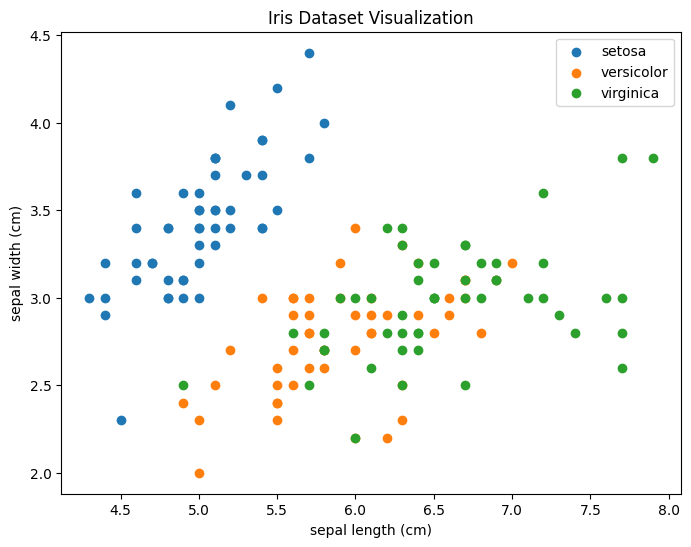

In [20]:
plt.figure(figsize=(8, 6))
for i, species in enumerate(iris.target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=species)

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Iris Dataset Visualization')
plt.legend()
plt.show()

3) Checking missing values

In [4]:
print(df.isnull().sum())  # Counting missing values per column



sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


4) Splitting the data into features (X) and target (y):

In [5]:
X = df.drop('species', axis=1)
y = df['species']


5)  Splitting the data into training and testing sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X refers to the input features (independent variables). y refers to the target variable (dependent variable). test_size specifies the proportion of the dataset to allocate for testing. In this case, 20% of the data will be used for testing, while the remaining 80% will be used for training. random_state sets a seed value to ensure reproducibility



6) Initializing and train the SVM model:
we use a linear kernel (kernel='linear') for simplicity

In [7]:
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

#The C parameter controls the trade-off between maximizing the margin and minimizing the classification error
#The SVM model will try to find the optimal hyperplane that best separates the different class

SVC(kernel='linear', random_state=42)

7) Making predictions on the test set:


In [8]:
y_pred = svm_model.predict(X_test)


8) Evaluating the model:
Calculating the accuracy, generating the classification report, and creating the confusion matrix to evaluating the performance of the SVM model

In [9]:
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report_output)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


9) Visualizing the confusion matrix as a heatmap:
This will create a heatmap using seaborn to visualize the confusion matrix. The conf_matrix obtained from the evaluation of the SVM model is used as input to the heatmap.

In [15]:
iris = load_iris()
X = iris.data
y = iris.target

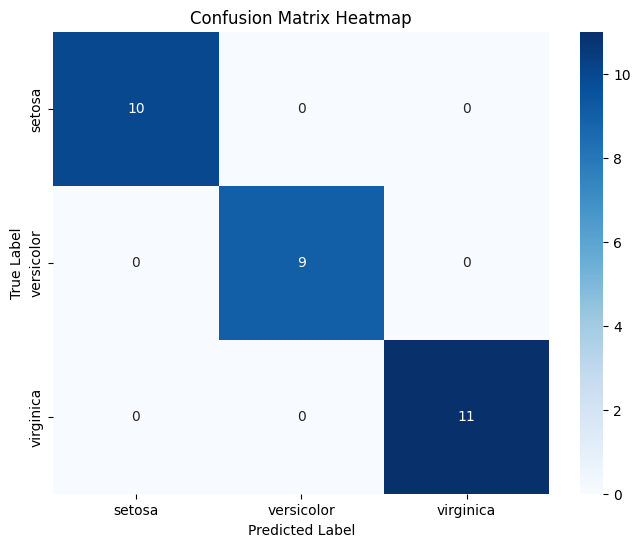

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()